<a href="https://colab.research.google.com/github/kozen88/HCV_DM23/blob/main/PCA_e_addestramento_decisionTree_e_ottimizzazione.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applicazione delle tecniche di PCA su proiezioni del dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('HCV_ImputerMean.csv', delimiter=',')
print(df)

      Age   Gender   BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0     56.0     1.0  35.0    2.0             1.0        1.0        1.0   
1     46.0     1.0  29.0    1.0             2.0        2.0        1.0   
2     57.0     1.0  33.0    2.0             2.0        2.0        2.0   
3     49.0     2.0  33.0    1.0             2.0        1.0        2.0   
4     59.0     1.0  32.0    1.0             1.0        2.0        1.0   
...    ...     ...   ...    ...             ...        ...        ...   
1380  44.0     1.0  29.0    1.0             2.0        2.0        2.0   
1381  55.0     1.0  34.0    1.0             2.0        2.0        1.0   
1382  42.0     1.0  26.0    2.0             2.0        1.0        1.0   
1383  52.0     1.0  29.0    2.0             1.0        1.0        2.0   
1384  55.0     2.0  26.0    1.0             2.0        2.0        2.0   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
0                                  2.0        2

In [ ]:
df.groupby('Baselinehistological staging').count()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading
Baselinehistological staging,,,,,,,,,,,,,,,,,,,,,
1,336,336,336,336,336,336,336,336,336,336,...,336,336,336,336,336,336,336,336,336,336
2,332,332,332,332,332,332,332,332,332,332,...,332,332,332,332,332,332,332,332,332,332
3,355,355,355,355,355,355,355,355,355,355,...,355,355,355,355,355,355,355,355,355,355
4,362,362,362,362,362,362,362,362,362,362,...,362,362,362,362,362,362,362,362,362,362


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sb
sb.set()

Effettuiamo l'esperimento di feature reduction andando a ridurre le 5 feature in una sola feature aggregata cercando si aggregare gli attributi inerenti ai test di RNA.

In [4]:
from sklearn.decomposition import PCA

# Seleziona solo le colonne contenenti i tuoi attributi (5 colonne nel tuo caso)
X_projection = df[['RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF']]

# Inizializza l'oggetto PCA e specifica il numero di componenti desiderate (1 nel tuo caso)
pca = PCA(n_components=1)

# Applica la PCA al tuo dataset
X_projection_reduced = pca.fit_transform(X_projection)

# andiiamo a creare un file excel per analizzare gli effetti della PCA
my_series_pca = pd.Series(X_projection_reduced.flatten())
# my_series_pca.to_excel("projection_RNA_pca.xlsx")
my_series_pca.describe()

count    1.385000e+03
mean    -1.613844e-11
std      3.639116e+05
min     -7.648730e+05
25%     -2.963474e+05
50%     -8.590007e+03
75%      2.996841e+05
max      7.705436e+05
dtype: float64

Ripetiamo l'esperimento di data reduction sul le feature delle transaminasi

In [5]:
# ripetiamo il processo su di un'altra proiezione che vada a prendere gli attributi delle transaminasi
X2_projection = df[['AST 1', 'ALT 1', 'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w']]
pca_2 = PCA(n_components=1)
X2_projection_reduced = pca_2.fit_transform(X2_projection)
my_series_pca2 = pd.Series(X2_projection_reduced.flatten())
# per generare i file excell da visualizzare
# my_series_pca2.to_excel("projection_trans_pca2.xlsx")
my_series_pca2.describe()

count    1.385000e+03
mean     1.600645e-15
std      2.786070e+01
min     -7.904297e+01
25%     -1.934655e+01
50%      2.150984e-01
75%      1.848205e+01
max      8.097623e+01
dtype: float64

In [6]:
df_wout_grading = df.drop('Baseline histological Grading', axis=1)
df_wout_grading

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baselinehistological staging
0,56.0,1.0,35.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,...,81.0,83.287265,83.800289,33.5,655330.0,634536.0,288194.000,398009.636364,402349.973081,2.0
1,46.0,1.0,29.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,...,113.0,57.000000,123.000000,44.0,40620.0,538635.0,637056.000,336804.000000,31085.000000,2.0
2,57.0,1.0,33.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,...,116.0,83.287265,83.800289,33.5,571148.0,661346.0,399921.828,735945.000000,558829.000000,4.0
3,49.0,2.0,33.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,...,88.0,48.000000,77.000000,33.0,1041941.0,449939.0,585688.000,744463.000000,582301.000000,3.0
4,59.0,1.0,32.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,...,120.0,94.000000,90.000000,30.0,660410.0,738756.0,3731527.000,338946.000000,242861.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44.0,1.0,29.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,...,127.0,63.000000,44.000000,45.0,387795.0,55938.0,399921.828,398009.636364,402349.973081,4.0
1381,55.0,1.0,34.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,...,108.0,97.000000,64.000000,41.0,481378.0,152961.0,393339.000,73574.000000,236273.000000,2.0
1382,42.0,1.0,26.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,...,116.0,87.000000,39.000000,24.0,612664.0,572756.0,806109.000,343719.000000,160457.000000,2.0
1383,52.0,1.0,29.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,...,47.0,48.000000,81.000000,43.0,139872.0,76161.0,515730.000,2460.000000,696074.000000,3.0


In [7]:
column_to_drop = ['AST 1', 'ALT 1', 'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w','RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF']
df_reduced = df_wout_grading.drop(column_to_drop, axis=1)
df_reduced

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,Baselinehistological staging
0,56.0,1.0,35.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,7425.0,4248807.0,14.0,112132.0,2.0
1,46.0,1.0,29.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,12101.0,4429425.0,10.0,129367.0,2.0
2,57.0,1.0,33.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,4178.0,4621191.0,12.0,151522.0,4.0
3,49.0,2.0,33.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,6490.0,4794631.0,10.0,146457.0,3.0
4,59.0,1.0,32.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,3661.0,4606375.0,11.0,187684.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44.0,1.0,29.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7044.0,4957174.0,15.0,202520.0,4.0
1381,55.0,1.0,34.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,6207.0,4636951.0,10.0,115776.0,2.0
1382,42.0,1.0,26.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,4913.0,4122038.0,14.0,128354.0,2.0
1383,52.0,1.0,29.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,7257.0,4241990.0,10.0,205908.0,3.0


andreamo adesso a creare il nuovo data set contenente le due riduzioni fatte e su tale data set proveremo l'addestramento di un albero

In [8]:
# Creazione delle due Series di esempio
my_series_pca
my_series_pca2

# Unione del DataFrame e delle Series per colonne
merged_df_pca = pd.concat([df_reduced, my_series_pca, my_series_pca2], axis=1)

# Stampa del DataFrame risultante
print(merged_df_pca)

      Age   Gender   BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0     56.0     1.0  35.0    2.0             1.0        1.0        1.0   
1     46.0     1.0  29.0    1.0             2.0        2.0        1.0   
2     57.0     1.0  33.0    2.0             2.0        2.0        2.0   
3     49.0     2.0  33.0    1.0             2.0        1.0        2.0   
4     59.0     1.0  32.0    1.0             1.0        2.0        1.0   
...    ...     ...   ...    ...             ...        ...        ...   
1380  44.0     1.0  29.0    1.0             2.0        2.0        2.0   
1381  55.0     1.0  34.0    1.0             2.0        2.0        1.0   
1382  42.0     1.0  26.0    2.0             2.0        1.0        1.0   
1383  52.0     1.0  29.0    2.0             1.0        1.0        2.0   
1384  55.0     2.0  26.0    1.0             2.0        2.0        2.0   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain       WBC  \
0                                  2.0     

In [9]:
# salviamo un dataset in questo formato per esperimenti futuri
merged_df_pca.to_excel("pca_reduced_data_frame_uncleaned.xlsx")
merged_df_pca.to_csv("pca_reduced_df_uncleaned.csv", index=False)


## Addestramento di un albero decisionale

Siamo pronti per testare un modello di apprendimento e capire che risultati produca con il dataset non ottimizzato.

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split

In [11]:
# Preparazione delle features e del target
X = df_reduced.drop('Baselinehistological staging', axis=1)
y = df_reduced['Baselinehistological staging']

# con questo approccio stiamo provando a effettuare uno spilt dei dati di partenza
# per generare le parttizioni di training e test con percentuale 80-20 in seguito useremo
# solo la partizione di training per effetttuare la cross validation su tali dati e in
# seguito sulla partizione di test restante la utilizzero alla fine sui dati mai visti
# Divisione del dataset in dati di training e dati di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7) # random_state = 7 batte la moda !!! but is very low

# Creazione del modello di albero decisionale
model = DecisionTreeClassifier(criterion='gini')

# Applicazione della cross-validation con 10 fold sui dati di training ovvero 80%
# tirato fuori dalla funzione di split
scores = cross_val_score(model, X_train, y_train, cv=10)
# Calcolo della media delle performance ottenute
mean_accuracy = scores.mean()

# Addestramento del modello sui dati di training completi
model.fit(X_train, y_train)

# Valutazione del modello sui dati di test
test_accuracy = model.score(X_test, y_test)

# Stampa delle performance
print("Accuracy media (cross-validation):", mean_accuracy)
print("Accuracy sui dati di test:", test_accuracy)

Accuracy media (cross-validation): 0.26004516129032257
Accuracy sui dati di test: 0.2805755395683453


Qui abbiamo provato l'approcio classico della letturatura di andare a lavorare con l'intero dataset e dopo averlo diviso in 10 partizioni uguali ne lasciamo una fuori e le restanti 9 faranno da training e il processo itererà per cambiare la partizione di test e ottenere 10 risultati differenti. Quello che stavamo facendo prima aveva una sua logica simile ad avere un evaluete set per runnare la cross-val su la parte grossa della partizione, e poi usare il test set che realmente sono dati mai visti per il model e mettere a confronto un single run sui dati di training uguali a quelli della stessa partizione della cross-val ma che in questo caso saranno usati esclusivamente per il training e la parte tirata fuori inizialmente con la split function viene ad essere utilizzata per il test di accurancy in seguito si confrontavano le performance tra la media ottenuta dalla cross e il single shoot come descritto. Ora invece usiamo un classico approccio only cross-val e vediamo che succede.

In [ ]:
# standard way to use the cross-val without the evaluate set
# Proviamo a vedere se ci sono differenze nelle performa utilizzando solo la cross-validation
model_only_cval = DecisionTreeClassifier(criterion='gini')

# usiamo la cross-val
scores2 = cross_val_score(model_only_cval, X, y, cv=10)
mean_accurancy2 = scores2.mean()
print(scores2)
print(mean_accurancy2)

[0.30215827 0.18705036 0.29496403 0.21582734 0.25179856 0.2173913
 0.26811594 0.23188406 0.27536232 0.26811594]
0.251266812636847


Ora poiché stiamo lanciando modelli facendo prove e vedendo cosa accade cerchiamo di mettere un po di scienza a supporto e andiamo ad ottimizzare per vedere se otteniamo qualche miglioramento. Per cui l'idea sarà effettuare una prova con 4 valori standard di cross-val e in seguito andremo a cercare qualcosa di più sofisticato. Prima però cerchiamo di farci un idea sul comportamento del classificatore con l'uso di più metriche di valutazione.

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_curve, fbeta_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

# funzione per il calcolo di una batterie di metriche di valutazione
def full_evaluate_multiclass(classifier, X, y):
    """
    Esegue una cross-validation con 10 fold per un classificatore multi-classe e calcola le metriche di valutazione.

    Parameters:
    classifier: Classificatore multi-classe.
    X (array-like): Matrice di dati di input.
    y (array-like): Vettore di etichette di output.

    Returns:
    None.
    """
    # Esegue la cross-validation con 10 fold
    scores = cross_val_score(classifier, X, y, cv=10)

    # Calcola le metriche di valutazione
    y_pred = cross_val_predict(classifier, X, y, cv=10)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    precision_macro = precision_score(y, y_pred, average='macro')
    precision_micro = precision_score(y, y_pred, average='micro')
    recall_macro = recall_score(y, y_pred, average='macro')
    recall_micro = recall_score(y, y_pred, average='micro')
    f1_macro = f1_score(y, y_pred, average='macro')
    f1_micro = f1_score(y, y_pred, average='micro')
    f2_micro = fbeta_score(y, y_pred, beta=2, average='micro')
    f2_macro = fbeta_score(y, y_pred, beta=2, average='macro')
    f2_weighted = fbeta_score(y, y_pred, beta=2, average='weighted')
    conf_matrix = confusion_matrix(y, y_pred)

    # Stampa le metriche di valutazione
    print("Accuracy:", scores.mean())
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Precision (Macro):", precision_macro)
    print("Precision (Micro):", precision_micro)
    print("Recall (Macro):", recall_macro)
    print("Recall (Micro):", recall_micro)
    print("F1-score (Macro):", f1_macro)
    print("F1-score (Micro):", f1_micro)
    print("F2-score (Micro):", f2_micro)
    print("F2-score (Macro):", f2_macro)
    print("F2-score (Weighted):", f2_weighted)
    print("Confusion matrix:\n", conf_matrix)

In [17]:
# istanziamo un modello di albero che sarà addestrato su cross-val per poi prendere visione delle principali metriche
clf_DT = DecisionTreeClassifier(criterion='gini')

# per visionare le principali metriche usate
full_evaluate_multiclass(clf_DT, X, y)

Accuracy: 0.24834219580857053
Precision: 0.25111903400603464
Recall: 0.251985559566787
F1-score: 0.2512758232319192
Precision (Macro): 0.25148802853128843
Precision (Micro): 0.251985559566787
Recall (Macro): 0.2526488354174839
Recall (Micro): 0.251985559566787
F1-score (Macro): 0.2517910604250375
F1-score (Micro): 0.251985559566787
F2-score (Micro): 0.251985559566787
F2-score (Macro): 0.2522386940914652
F2-score (Weighted): 0.2516349854610132
Confusion matrix:
 [[ 81  75  90  90]
 [ 69  96  81  86]
 [ 85  93  96  81]
 [ 86  97 103  76]]


In [12]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# funzione per il calcolo della Roc_AUC_score
def evaluate_roc_auc(classifier, X, y):
    """
    Calcola la metrica roc_auc_score e plotta la curva ROC multi-classe per un classificatore multi-classe.

    Parameters:
    classifier: Classificatore multi-classe.
    X (array-like): Matrice di dati di input.
    y (array-like): Vettore di etichette di output.

    Returns:
    None.
    """
    # Esegue la cross-validation con 10 fold
    y_pred = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

    # Calcola la metrica roc_auc_score
    y_bin = label_binarize(y, classes=np.unique(y))
    roc_auc_score_macro = roc_auc_score(y_bin, y_pred, average='macro')

    # Calcola la curva ROC multi-classe
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = y_bin.shape[1]
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Calcola la media delle aree sotto la curva ROC per ogni classe
    roc_auc_score_micro = np.mean(list(roc_auc.values()))

    # Plotta la curva ROC multi-classe
    plt.figure()
    lw = 2
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Stampa la metrica roc_auc_score
    print("ROC AUC Score (macro):", roc_auc_score_macro)
    print("ROC AUC Score (micro):", roc_auc_score_micro)

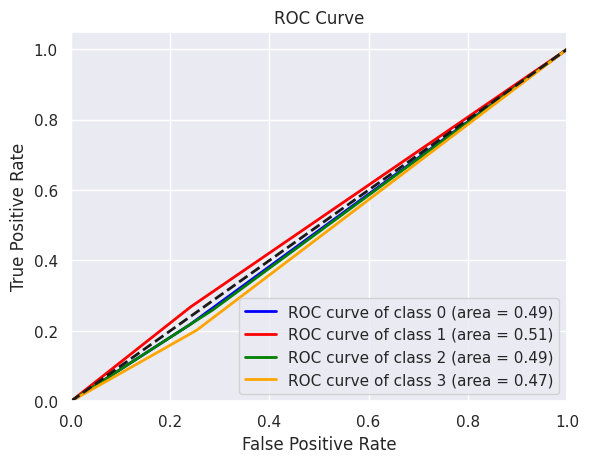

ROC AUC Score (macro): 0.49088021040422636
ROC AUC Score (micro): 0.49088021040422636


In [16]:
# i9stanziamo un nuovo modello di Decision Tree per effettuare le valutazioni con il roc_auc_score
clf_DT2 = DecisionTreeClassifier(criterion='gini')

# creazione del grafico di roc_auc_score
evaluate_roc_auc(clf_DT2, X, y)

Con il seguente snipet andiamo a creare un particolare oggetto che contiene tutte le info sull'albero decisionale appena addestrato e che ci permetterà di vedere i sui nodi e i test effettuati.

#### Visualizzazione dei parametri dell'ablbero decisionale

In [19]:
import graphviz
from sklearn import tree

# andiamo a creare un file formato dot che raccolga le info sull'albero addestrato in modo da
# poter creare un immagine che mostri i nodi dell'albero con le informazioni contenute al suo interno.
dot_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("albero_decisionale", format='png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.806652 to fit


'albero_decisionale.png'

[Text(0.5981059269113814, 0.975, 'x[2] <= 32.5\ngini = 0.75\nsamples = 1246\nvalue = [303, 300, 311, 332]'),
 Text(0.3050031222849696, 0.925, 'x[11] <= 4307865.0\ngini = 0.748\nsamples = 958\nvalue = [235, 212, 240, 271]'),
 Text(0.192068038662033, 0.875, 'x[11] <= 4136893.0\ngini = 0.743\nsamples = 375\nvalue = [88, 76, 119, 92]'),
 Text(0.12512217636837533, 0.825, 'x[10] <= 11142.5\ngini = 0.748\nsamples = 254\nvalue = [67, 55, 67, 65]'),
 Text(0.0478116854908775, 0.775, 'x[2] <= 22.5\ngini = 0.746\nsamples = 221\nvalue = [65, 45, 54, 57]'),
 Text(0.011294526498696786, 0.725, 'x[10] <= 9407.5\ngini = 0.582\nsamples = 19\nvalue = [11, 1, 5, 2]'),
 Text(0.0069504778453518675, 0.675, 'x[12] <= 10.5\ngini = 0.461\nsamples = 16\nvalue = [11, 1, 4, 0]'),
 Text(0.0034752389226759338, 0.625, 'x[10] <= 4736.5\ngini = 0.375\nsamples = 4\nvalue = [1, 0, 3, 0]'),
 Text(0.0017376194613379669, 0.575, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]'),
 Text(0.005212858384013901, 0.575, 'gini = 0.0\n

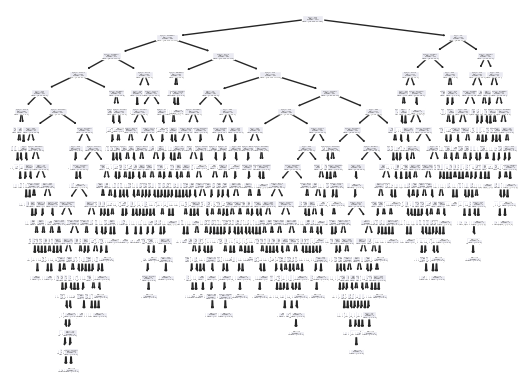

In [20]:
tree.plot_tree(model)

In [21]:
# Visualizzazione dell'importanza delle feature
print("Importanza delle feature:")
print(model.feature_importances_)

# Visualizzazione dell'albero decisionale
# print("Rappresentazione interna dell'albero:")
# print(model.tree_)

Importanza delle feature:
[0.14416193 0.02528084 0.10290146 0.02156166 0.02893833 0.02363536
 0.014524   0.02178989 0.01722906 0.0393912  0.14624807 0.1733722
 0.05717211 0.1837939 ]


Andiamo a visualizzare il numero di esempi che sono stati catturati in ogni foglia del nostro albero e vediamo che lavora è stato svolto dal modello.

In [22]:
# Assegna ogni campione al nodo foglia corrispondente
leaf_indices = model.apply(X)

# Conta il numero di campioni in ogni nodo foglia
unique_leaves, counts = np.unique(leaf_indices, return_counts=True)

# Stampa il numero di campioni in ogni nodo foglia
for leaf, count in zip(unique_leaves, counts):
    print(f"Nodo foglia {leaf} - Numero di esempi: {count}")

Nodo foglia 8 - Numero di esempi: 1
Nodo foglia 9 - Numero di esempi: 3
Nodo foglia 12 - Numero di esempi: 1
Nodo foglia 13 - Numero di esempi: 1
Nodo foglia 14 - Numero di esempi: 10
Nodo foglia 16 - Numero di esempi: 1
Nodo foglia 17 - Numero di esempi: 2
Nodo foglia 22 - Numero di esempi: 1
Nodo foglia 24 - Numero di esempi: 1
Nodo foglia 25 - Numero di esempi: 1
Nodo foglia 26 - Numero di esempi: 8
Nodo foglia 30 - Numero di esempi: 1
Nodo foglia 31 - Numero di esempi: 9
Nodo foglia 32 - Numero di esempi: 3
Nodo foglia 36 - Numero di esempi: 2
Nodo foglia 37 - Numero di esempi: 1
Nodo foglia 39 - Numero di esempi: 6
Nodo foglia 42 - Numero di esempi: 1
Nodo foglia 43 - Numero di esempi: 2
Nodo foglia 46 - Numero di esempi: 1
Nodo foglia 47 - Numero di esempi: 2
Nodo foglia 48 - Numero di esempi: 2
Nodo foglia 51 - Numero di esempi: 4
Nodo foglia 54 - Numero di esempi: 6
Nodo foglia 55 - Numero di esempi: 1
Nodo foglia 57 - Numero di esempi: 1
Nodo foglia 58 - Numero di esempi: 1
No

Molti nodi foglia hanno pochissimi esempi la maggiorparte hanno 2 o 1 esempio sembra che il modello si stia adattando troppo ai dati di training.

Proviamo ad addestrare un altro albero che abbia un minimo di supporto nelle foglie pari a 10 esempi.

In [25]:
# OTTIMO TEST QUESTO MODELLO SEMBRA PROMETTENTE
# istanziamo un modello di albero decisionale con minimo supporto nelle foglie a 10
treeClf = tree.DecisionTreeClassifier(min_samples_leaf=10)

# usiamo la cross-val
scores_treeClf = cross_val_score(treeClf, X, y, cv=10)
mean_accurancy_treeClf = scores_treeClf.mean()
print(scores_treeClf)
print(mean_accurancy_treeClf)

[0.25179856 0.23021583 0.25899281 0.35251799 0.26618705 0.1884058
 0.3115942  0.21014493 0.28985507 0.26086957]
0.26205817954332183


In [28]:
# treeClf.fit(X,y)
# Assegna ogni campione al nodo foglia corrispondente
leaf_indices_treeClf = treeClf.apply(X)

# Conta il numero di campioni in ogni nodo foglia
unique_leaves_treeClf, counts_treeClf = np.unique(leaf_indices_treeClf, return_counts=True)

# Stampa il numero di campioni in ogni nodo foglia
for leaf1, count1 in zip(unique_leaves_treeClf, counts_treeClf):
    print(f"Nodo foglia {leaf1} - Numero di esempi: {count1}")

Nodo foglia 7 - Numero di esempi: 13
Nodo foglia 9 - Numero di esempi: 11
Nodo foglia 13 - Numero di esempi: 11
Nodo foglia 14 - Numero di esempi: 15
Nodo foglia 16 - Numero di esempi: 12
Nodo foglia 17 - Numero di esempi: 11
Nodo foglia 20 - Numero di esempi: 10
Nodo foglia 21 - Numero di esempi: 19
Nodo foglia 23 - Numero di esempi: 11
Nodo foglia 24 - Numero di esempi: 10
Nodo foglia 27 - Numero di esempi: 17
Nodo foglia 28 - Numero di esempi: 13
Nodo foglia 32 - Numero di esempi: 19
Nodo foglia 33 - Numero di esempi: 11
Nodo foglia 35 - Numero di esempi: 11
Nodo foglia 36 - Numero di esempi: 10
Nodo foglia 39 - Numero di esempi: 16
Nodo foglia 40 - Numero di esempi: 11
Nodo foglia 42 - Numero di esempi: 14
Nodo foglia 43 - Numero di esempi: 14
Nodo foglia 46 - Numero di esempi: 16
Nodo foglia 47 - Numero di esempi: 12
Nodo foglia 48 - Numero di esempi: 10
Nodo foglia 50 - Numero di esempi: 12
Nodo foglia 51 - Numero di esempi: 14
Nodo foglia 54 - Numero di esempi: 14
Nodo foglia 56

Dopo aver eseguito un paio di run del modello ci accorgiamo il supporto minimo aumentato a dieci nelle foglie ha portato ad una maggiore stabilità del modello in particolare sembra attestarsi con una accurancy del 26% a questo punto effettueremo maggiori approfondimenti per capire se l'albero sarà un buon candidato per battere le previsioni fatte dalla moda.

In [ ]:
# Addestramento del modello sui dati di training completi
treeClf.fit(X, y)

dot_data_treeClf = tree.export_graphviz(treeClf, out_file=None)
graph_treeClf = graphviz.Source(dot_data)
graph_treeClf.render("albero_decisionale_minimo_supporto_10", format='png')

# Visualizzazione dell'importanza delle feature
print("Importanza delle feature:")
print(model.feature_importances_)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.809922 to fit


Importanza delle feature:
[0.13137516 0.02010085 0.09334333 0.02413125 0.02426819 0.01884796
 0.02528165 0.02241444 0.02152447 0.03519776 0.14336859 0.1895216
 0.06856728 0.18205746]


##### ottimizzazione sul numero di nodi a supporto nei nodi foglia

In [ ]:
from sklearn.metrics import accuracy_score
def plot_accuracy_vs_min_samples(X, y, min_samples_range):
    X, y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

    accuracy_scores = []

    for min_samples_leaf in min_samples_range:
        # Addestramento del modello con il numero minimo di esempi di supporto corrente
        clf_T = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
        clf_T.fit(X_train, y_train)

        # Valutazione dell'accuratezza del modello sul set di test
        y_pred = clf_T.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    # Tracciamento del grafico dell'andamento dell'accuratezza
    plt.plot(min_samples_range, accuracy_scores, marker='o')
    plt.xlabel('Numero Minimo di Esempi di Supporto')
    plt.ylabel('Accuratezza')
    plt.title('Andamento dell\'Accuratezza al variare del Numero Minimo di Esempi di Supporto')
    plt.show()


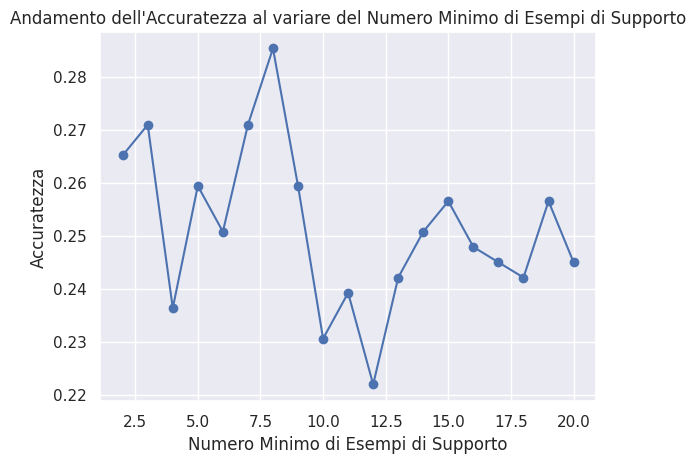

In [ ]:
plot_accuracy_vs_min_samples(X, y, np.arange(2,21))

I valori ottimizzati si ottengono con un numero minimo nelle foglie compreso tra 6 e 9.

### Ottimizzazione del'albero decisionale sui valori di fold per la cross validation

In [30]:
# List of cv values to test
cv_values = [5, 10, 15, 20]

# Iterate over different cv values
for cv in cv_values:
    model3 = DecisionTreeClassifier(criterion='gini')
    scores3 = cross_val_score(model3, X, y, cv=cv)
    mean_accuracy3 = scores3.mean()
    print("CV:", cv)
    print("Mean Accuracy:", mean_accuracy3)
    print("Scores:", scores3)
    print("----------")

CV: 5
Mean Accuracy: 0.2563176895306859
Scores: [0.25270758 0.26353791 0.28880866 0.2599278  0.2166065 ]
----------
CV: 10
Mean Accuracy: 0.23828589302471065
Scores: [0.25899281 0.18705036 0.25179856 0.18705036 0.28057554 0.23188406
 0.2826087  0.26086957 0.21014493 0.23188406]
----------
CV: 15
Mean Accuracy: 0.24840268038024
Scores: [0.27956989 0.2688172  0.1827957  0.19354839 0.27956989 0.25
 0.2173913  0.26086957 0.18478261 0.25       0.2826087  0.17391304
 0.27173913 0.26086957 0.36956522]
----------
CV: 20
Mean Accuracy: 0.233944099378882
Scores: [0.31428571 0.21428571 0.25714286 0.15714286 0.21428571 0.23188406
 0.28985507 0.2173913  0.24637681 0.28985507 0.23188406 0.2173913
 0.24637681 0.36231884 0.20289855 0.2173913  0.20289855 0.17391304
 0.15942029 0.23188406]
----------


Passiamo alla massima ottimizzazione del parametro di cross-fold-validation  e plottiamo i risultati per capire quale sia il migliore.

CV: 2
Mean Accuracy: 0.23898981557941096
Scores: [0.23809524 0.23988439]
----------
CV: 3
Mean Accuracy: 0.2454730133688919
Scores: [0.25757576 0.25324675 0.22559653]
----------
CV: 4
Mean Accuracy: 0.2353887991204544
Scores: [0.22190202 0.23988439 0.2283237  0.25144509]
----------
CV: 5
Mean Accuracy: 0.24332129963898916
Scores: [0.24548736 0.26714801 0.2599278  0.20216606 0.24187726]
----------
CV: 6
Mean Accuracy: 0.2447957839262187
Scores: [0.21645022 0.22077922 0.26406926 0.25974026 0.22077922 0.28695652]
----------
CV: 7
Mean Accuracy: 0.2685997026098549
Scores: [0.26767677 0.22222222 0.31313131 0.25757576 0.29292929 0.24747475
 0.27918782]
----------
CV: 8
Mean Accuracy: 0.26571739419307683
Scores: [0.24712644 0.24855491 0.26589595 0.32947977 0.26589595 0.24277457
 0.29479769 0.23121387]
----------
CV: 9
Mean Accuracy: 0.24839902290882682
Scores: [0.26623377 0.23376623 0.2012987  0.29220779 0.22727273 0.20779221
 0.31168831 0.21428571 0.28104575]
----------
CV: 10
Mean Accuracy:

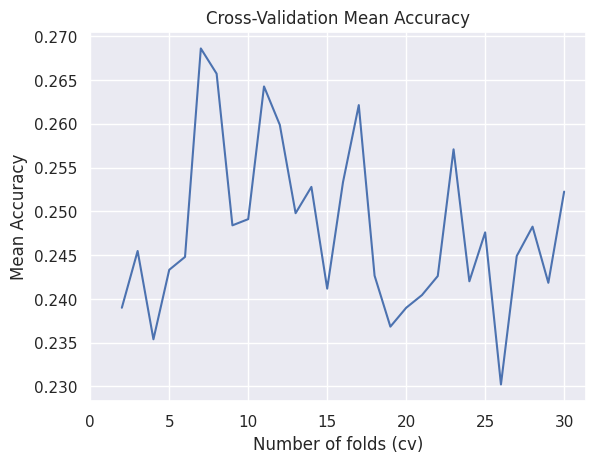

In [31]:
# Questo esperimento è stato condoto su un range con max 31, 100 e 300 non si è andato
# oltre poichè già con fold da 300 è diffile che ci siano
cv_range = range(2, 31)  # parametri da provare per la cross-val
mean_accuracies_list = [] # raccolta dei risultati

for cv in cv_range:
    model4 = DecisionTreeClassifier(criterion='gini')
    scores4 = cross_val_score(model4, X, y, cv=cv)
    mean_accuracy4 = scores4.mean()
    mean_accuracies_list.append(mean_accuracy4)
    print("CV:", cv)
    print("Mean Accuracy:", mean_accuracy4)
    print("Scores:", scores4)
    print("----------")

# Plotting the mean accuracies
plt.plot(cv_range, mean_accuracies_list)
plt.xticks(np.arange(0, 31, 5))
plt.xlabel('Number of folds (cv)')
plt.ylabel('Mean Accuracy')
plt.title('Cross-Validation Mean Accuracy')
plt.show()

In [32]:
from sklearn.metrics import accuracy_score, roc_auc_score, fbeta_score, precision_score, recall_score, roc_curve
decision_tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

# andiamo a calcolare le predizioni sul trest set
y_pred = decision_tree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.2805755395683453


## Addestramento dell'albero sul data set iniziale per avere una baseline

In [ ]:
# Preparazione delle features e del target
X = df.drop('Baselinehistological staging', axis=1)
y = df['Baselinehistological staging']

# Divisione del dataset in dati di training e dati di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Creazione del modello di albero decisionale
model = DecisionTreeClassifier()

# Addestramento del modello sui dati di training completi
model.fit(X_train, y_train)

# Applicazione della cross-validation con 10 fold sui dati di training
scores = cross_val_score(model, X_train, y_train, cv=10)

# Calcolo della media delle performance ottenute
mean_accuracy = scores.mean()

# Valutazione del modello sui dati di test
test_accuracy = model.score(X_test, y_test)

# Stampa delle performance
print("Accuracy media (cross-validation):", mean_accuracy)
print("Accuracy sui dati di test:", test_accuracy)

Accuracy media (cross-validation): 0.23104832104832104
Accuracy sui dati di test: 0.23465703971119134


dopo i pessimi risultati ottenuti vogliamo capire che cosa avrebbe fatto un modello che banalmente avrebbe sempre predetto la classe più frequente del data set


In [ ]:
# Prepazione del target
y_t = df['Baselinehistological staging']

# Calcolo della classe media del target
y_p = [4] * len(y_t)

# Calcolo dell'accuratezza
acc = accuracy_score(y_t, y_p)

# Stampa dell'accuratezza
print("Accuracy:", acc)

Accuracy: 0.26137184115523465


conclusione ad oggi il modello è pessimo!!!!!!

## Ottimizzazione dei parametri tramite una grid search

In [33]:
# questa funzione va a valutare un dizionario di parametri che le viene ad essere passato in input
def grid_search_and_plot(X, y, param_grid):
    # Suddivisione del dataset in set di addestramento e test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

    param_names = list(param_grid.keys())
    num_params = len(param_names)

    # Inizializzazione delle liste per l'accuratezza e i valori dei parametri
    accuracies = []
    param_values = []

    # Iterazione attraverso i diversi parametri che sono forniti i input con il dizionario
    for param_name in param_names:
        param_range = param_grid[param_name]

        # Inizializzazione delle liste per l'accuratezza corrente e i valori del parametro corrente
        current_accuracies = []
        current_param_values = []

        # Iterazione attraverso i diversi valori del parametro corrente
        for param_value in param_range:
            # Creazione del dizionario dei parametri
            param_dict = {param_name: param_value}

            # Addestramento del modello con i parametri correnti selezionati
            clf = DecisionTreeClassifier(**param_dict)
            clf.fit(X_train, y_train)

            # Valutazione dell'accuratezza del modello sul set di test
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            # Memorizzazione dei risultati correnti
            current_accuracies.append(accuracy)
            current_param_values.append(param_value)

        # Memorizzazione delle liste correnti nella lista globale
        accuracies.append(current_accuracies)
        param_values.append(current_param_values)

    # Tracciamento dei grafici per l'andamento dei diversi parametri rispetto all'accuratezza
    for i in range(num_params):
        plt.figure()
        plt.plot(param_values[i], accuracies[i], marker='o')
        plt.xlabel(param_names[i])
        plt.ylabel('Accuratezza')
        plt.title(f'Andamento dell\'Accuratezza in funzione di {param_names[i]}')
        plt.show()

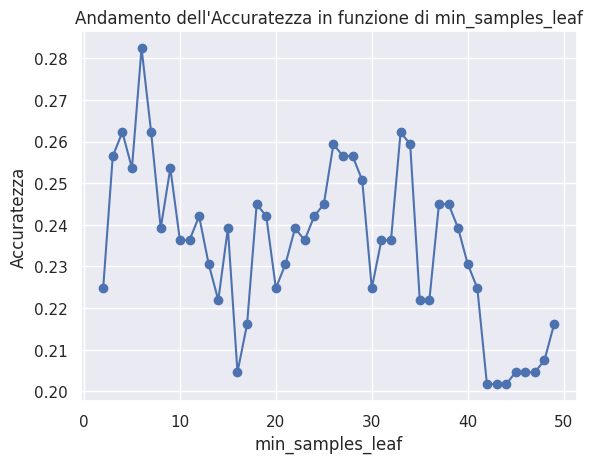

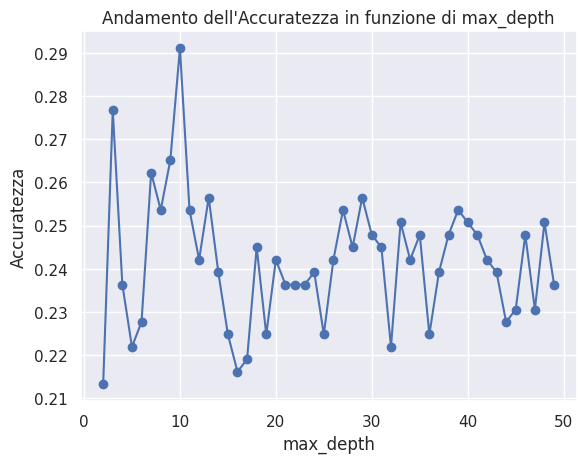

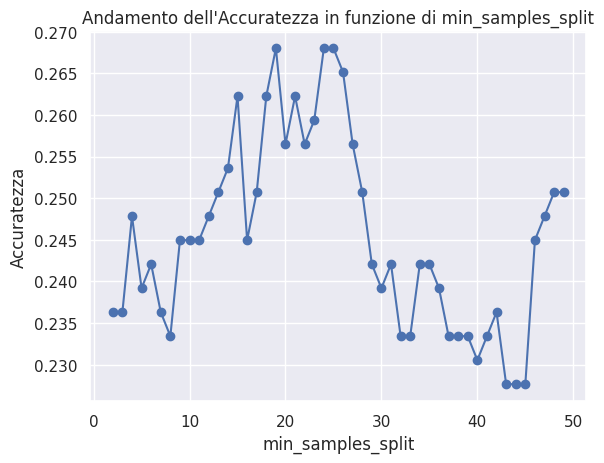

In [34]:
# settaggio delle liste di parametri e del dizionario che passeremo in input alla funzione per aandare a ottimizzare i
# i parametri contenenti ogniuno le rispettive liste di valori da valutare.
testing_val = range(2,50)
parameter_test = {
    'min_samples_leaf': testing_val,
    'max_depth': testing_val,
    'min_samples_split': testing_val
}

grid_search_and_plot(X, y, parameter_test)

Adesso andiamo ad effettuare un refractioning della precedente funzione che abbiamo utilizzato per l'ottimizzazione solo di alcuni parametri e la miglioriamo in modo che sia capace di effettuare una grid search completa su tutti i parametri dell'albero e in fine ci plotti dei grafici che mettano in relazione l'accuratenza con i parametri che abbiamo fatto variare in alcuni particolare range. Questo test sarà decisivo ci permetterà di estrarre i parametri dell'albero migliori i quali utilizzerremo per l'addestramento e valutazione finale dell'albero decisionale ottimizzato.

In [35]:
def grid_search_and_plot_fullOttimization(X, y, param_grid):
    # Suddivisione del dataset in set di addestramento e test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

    param_names = list(param_grid.keys())
    num_params = len(param_names)

    # Inizializzazione delle liste per l'accuratezza e i valori dei parametri
    accuracies = [[] for _ in range(num_params)]
    param_values = [[] for _ in range(num_params)]

    # Iterazione attraverso i diversi parametri
    for i, param_name in enumerate(param_names):
        param_range = param_grid[param_name]

        # Iterazione attraverso i diversi valori del parametro corrente
        for param_value in param_range:
            # Creazione del dizionario dei parametri
            param_dict = {param_name: param_value}

            # Addestramento del modello con i parametri correnti
            clf = DecisionTreeClassifier(**param_dict)
            clf.fit(X_train, y_train)

            # Valutazione dell'accuratezza del modello sul set di test
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            # Memorizzazione dei risultati correnti
            accuracies[i].append(accuracy)
            param_values[i].append(param_value)

        # Tracciamento del grafico per l'andamento del parametro corrente rispetto all'accuratezza
        plt.figure()
        plt.plot(param_values[i], accuracies[i], marker='o')
        plt.xlabel(param_names[i])
        plt.ylabel('Accuratezza')
        plt.title(f'Andamento dell\'Accuratezza in funzione di {param_names[i]}')
        plt.show()

    #return accuracies, param_values


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


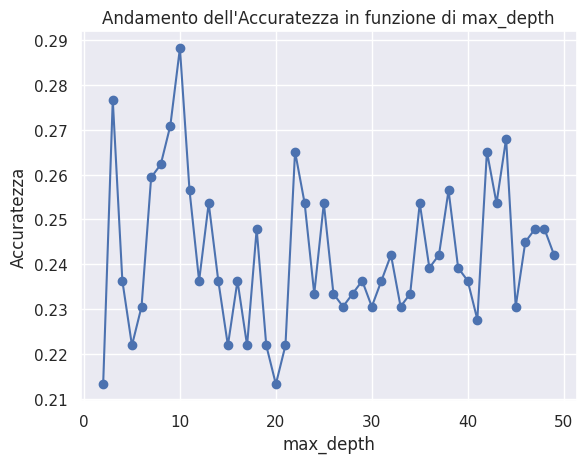

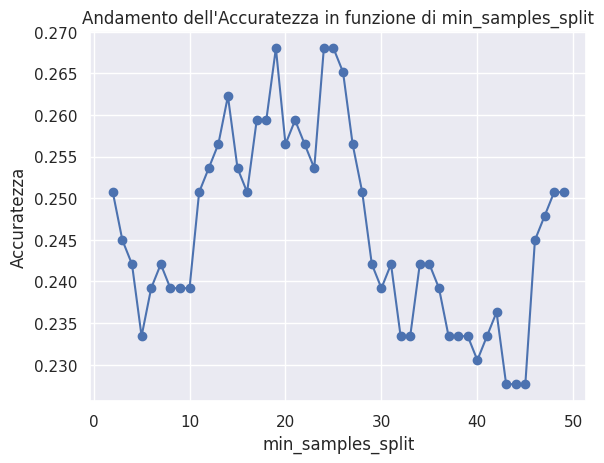

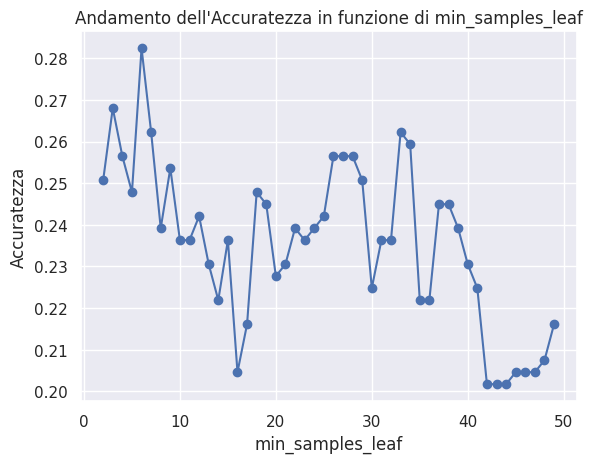

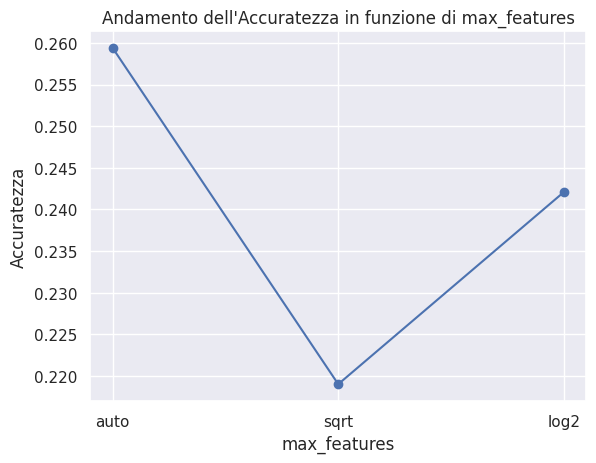

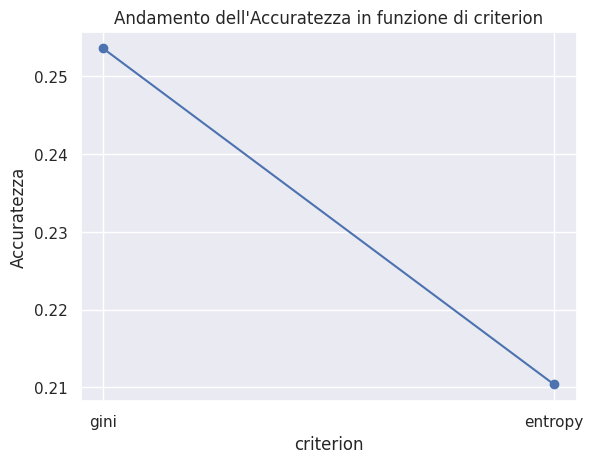

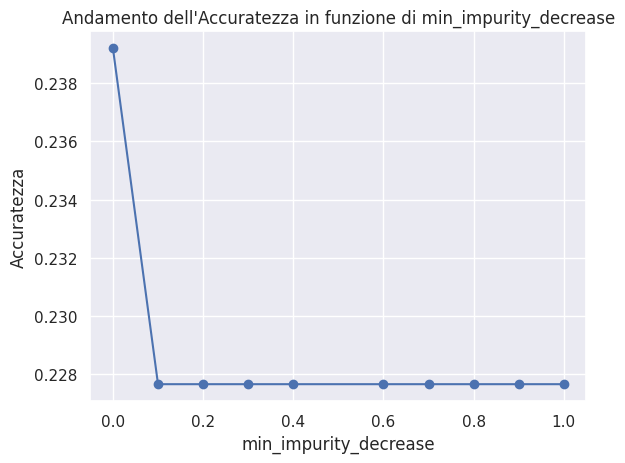

In [36]:
# creiamo una lista di valori per il test sul parametro min_impurity_decrease
test_impurity_val = np.around(np.linspace(0.0, 1.0, num=10), decimals=1)

# istanziamo e assegnamo il dizionario contenente i parametri da testare e i rispettivi valori assegnati per il test
param_grid = {
    'max_depth': testing_val,
    'min_samples_split': testing_val,
    'min_samples_leaf': testing_val,
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'min_impurity_decrease': test_impurity_val
}

# eseguiamo i test di ottimizzazione dei parametri tramite grid search
grid_search_and_plot(X, y, param_grid)

#### Conclusioni sull'ottimizzazione dei parametri dell'albero
Dopo aver eseguito una serie approfonditaa di test di ottimizzazione giungiamo alla conclusione che i migliori parametri da ultilizzare per l'addestramento del modello  finale sono:
- max_depth = 10 // profondità albero
- min_sample_split = 25 // supporto minimo di esempi per la divisione
- min_sample_leaf = 6 // minimo supporto di esempi nelle foglie
- max feature = log2
- criterion = gini
- min_impurity_decrease = 0.0

Con questa configurazione di parametri procediamo all'addestramento del modello ottimizzato.

##### Addestramento finale sul modello ottimizzato

In [37]:
Ottimized_Tree = DecisionTreeClassifier(max_depth=10, min_samples_split=25, min_samples_leaf=6, max_features='log2', criterion='gini', min_impurity_decrease=0)

# usiamo la cross-val
scores_ottimized_tree = cross_val_score(Ottimized_Tree, X, y, cv=10)
mean_accurancy_ottimized_tree = scores_ottimized_tree.mean()
print(scores_ottimized_tree)
print(mean_accurancy_ottimized_tree)

[0.28057554 0.25899281 0.30935252 0.28776978 0.20863309 0.21014493
 0.24637681 0.22463768 0.26811594 0.30434783]
0.25989469294129913


In [38]:
# istanziamo un modello di albero che sarà addestrato su cross-val per poi prendere visione delle principali metriche
clf_DT_ottimized = DecisionTreeClassifier(max_depth=10, min_samples_split=25, min_samples_leaf=6, max_features='log2', criterion='gini', min_impurity_decrease=0)

# per visionare le principali metriche usate
full_evaluate_multiclass(clf_DT_ottimized, X, y)

Accuracy: 0.24403607548743614
Precision: 0.2431860689235843
Recall: 0.24187725631768953
F1-score: 0.24220008108272714
Precision (Macro): 0.2426303913743096
Precision (Micro): 0.24187725631768953
Recall (Macro): 0.24144470946583002
Recall (Micro): 0.24187725631768953
F1-score (Macro): 0.2417080614354976
F1-score (Micro): 0.24187725631768953
F2-score (Micro): 0.24187725631768955
F2-score (Macro): 0.2414726156038393
F2-score (Weighted): 0.24192858316503593
Confusion matrix:
 [[ 77  77  72 110]
 [ 83  77  74  98]
 [109  86  86  74]
 [ 98  82  87  95]]


###### Conclusioni sul modello ottimizzato
Le ottimizzazione sembravano essere promettenti dai test che abbiamo eseguito, ma portroppo il modello con il set di parametri ottimizzato sembra essere inadeguato e non batte la moda.

In [ ]:
# Creazione del dataframe per la tabella
data = {
    'Scores': scores_ottimized_tree,
    'Mean Accuracy': mean_accurancy_ottimized_tree
}
result_table = pd.DataFrame(data)

# Formattazione dei punteggi come stringhe con 2 decimali
result_table['Scores'] = result_table['Scores'].map('{:.2f}'.format)

# Generazione della tabella in formato Markdown
markdown_table = result_table.to_markdown(index=False)

# Stampa della tabella
print(markdown_table)

|   Scores |   Mean Accuracy |
|---------:|----------------:|
|     0.21 |        0.242655 |
|     0.19 |        0.242655 |
|     0.32 |        0.242655 |
|     0.22 |        0.242655 |
|     0.2  |        0.242655 |
|     0.26 |        0.242655 |
|     0.25 |        0.242655 |
|     0.28 |        0.242655 |
|     0.24 |        0.242655 |
|     0.26 |        0.242655 |


## Beam Search per la selezione dei migliori parametri per il modello

Andiamo a definire una funzione che prenderà in input il dataframe diviso in train e test e avrà un dizionario con i parametri che vogliamo ottimizzare e le liste di valori da dare in pasto alla funzione affinchè siano testati in combinazione e sia estratta la migliore combinazione. L'estrazione di tali parametri è affidata ad un algoritmo di beam search dove è possibile impostare il numero di beam da portare avantri nella ricerca e il numero di iterazione che si vogliono compiere.

In [39]:
import itertools

def beam_search(param_space, X_train, y_train, X_val, y_val, beam_width, num_iterations):
    best_params = None
    best_accuracy = 0.0

    # Genera tutte le possibili combinazioni di parametri
    all_param_combinations = list(itertools.product(*param_space.values()))

    # Inizializza il beam con alcune combinazioni di parametri casuali o predefinite
    beam = all_param_combinations[:beam_width]

    for _ in range(num_iterations):
        new_beam = []

        for params in beam:
            # Addestra l'albero decisionale utilizzando i parametri correnti
            tree = DecisionTreeClassifier(**dict(zip(param_space.keys(), params)))
            tree.fit(X_train, y_train)

            # Valuta l'accuratezza sull'insieme di validazione
            y_pred = tree.predict(X_val)
            accuracy = accuracy_score(y_val, y_pred)

            # Aggiorna la migliore combinazione di parametri
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = params

            # Genera nuove combinazioni di parametri
            new_param_combinations = list(itertools.product(*[param_space[key] for key in param_space.keys() if key not in params]))
            new_beam.extend(new_param_combinations)

        # Seleziona i k migliori candidati per l'iterazione successiva
        beam = sorted(new_beam, key=lambda x: x[0], reverse=True)[:beam_width]

    return best_params, best_accuracy


In [40]:
# Suddivisione del dataset in set di addestramento e test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)
# Definisci lo spazio dei parametri da esplorare

test_range = range(2,50)

param_space = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "min_samples_split": test_range,
    "min_samples_leaf": test_range,
    "min_weight_fraction_leaf": [0.0],
    "max_features": [None, "auto", "sqrt", "log2"],
    "max_leaf_nodes": test_range,
    "min_impurity_decrease":[0.0]
}

# Chiamata alla funzione beam_search
best_params, best_accuracy = beam_search(param_space, X_train, y_train, X_test, y_test, beam_width=3, num_iterations=5)

# Stampa i risultati
print("Migliori parametri:", best_params)
print("Accuratezza migliore:", best_accuracy)

Migliori parametri: ('gini', 'best', 2, 2, 0.0, None, 3, 0.0)
Accuratezza migliore: 0.2733812949640288


In [53]:
# istanziamo un modello di albero ottimale che sarà addestrato su cross-val per poi prendere visione delle principali metriche
clf_DT_ottimized2 = DecisionTreeClassifier(criterion='gini', splitter='best',  min_samples_split=2, min_samples_leaf=2, min_weight_fraction_leaf=0.0, max_features=None, max_leaf_nodes=3 ,min_impurity_decrease=0.0)

# per visionare le principali metriche usate
full_evaluate_multiclass(clf_DT_ottimized2, X, y)

Accuracy: 0.26789698675841933
Precision: 0.2522625087337851
Recall: 0.267870036101083
F1-score: 0.21698201789351215
Precision (Macro): 0.2516236095440281
Precision (Micro): 0.267870036101083
Recall (Macro): 0.2626671856618421
Recall (Micro): 0.267870036101083
F1-score (Macro): 0.21416184046466288
F1-score (Micro): 0.267870036101083
F2-score (Micro): 0.267870036101083
F2-score (Macro): 0.23569215410940053
F2-score (Weighted): 0.2396152479818039
Confusion matrix:
 [[  1  85  52 198]
 [  0  89  52 191]
 [  1  85  62 207]
 [  3  82  58 219]]


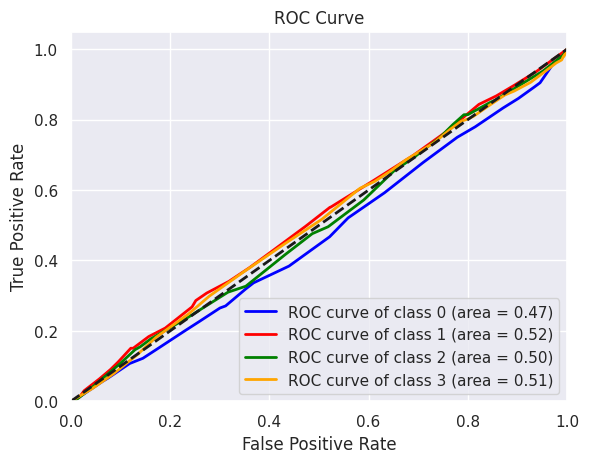

ROC AUC Score (macro): 0.49643757662038934
ROC AUC Score (micro): 0.49643757662038934


In [54]:
# istanziamo un nuovo modello di Decision Tree ottimale per effettuare le valutazioni con il roc_auc_score
clf_DT4_ot = DecisionTreeClassifier(criterion='gini', splitter='best',  min_samples_split=2, min_samples_leaf=2, min_weight_fraction_leaf=0.0, max_features=None, max_leaf_nodes=3 ,min_impurity_decrease=0.0)

# creazione del grafico di roc_auc_score
evaluate_roc_auc(clf_DT4_ot, X, y)

In [41]:
# Definisci lo spazio dei parametri da esplorare
param_space_2 = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "min_weight_fraction_leaf": [0.0, 0.1, 0.2],
    "max_features": [None, "auto", "sqrt", "log2"],
    "max_leaf_nodes": [None, 5, 10, 20],
    "min_impurity_decrease": [0.0, 0.1, 0.2]
}

# Chiamata alla funzione beam_search
best_params_2, best_accuracy_2 = beam_search(param_space, X_train, y_train, X_test, y_test, beam_width=8, num_iterations=15)

# Stampa i risultati
print("Migliori parametri:", best_params_2)
print("Accuratezza migliore:", best_accuracy_2)

Migliori parametri: ('gini', 'best', 2, 2, 0.0, None, 3, 0.0)
Accuratezza migliore: 0.2733812949640288
